In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas_datareader.data as web
import datetime
import math
from sklearn import preprocessing

In [2]:
# Checkout the Stock data
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,9,14)

df = web.DataReader("AAPL",'yahoo',start,end)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,72.338036
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,71.320679
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.754066
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,70.134438
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.632866


In [3]:
# Moving average of the stock for thr last 100 days

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [4]:
mavg.tail()

Date
2019-09-09    199.161318
2019-09-10    199.312470
2019-09-11    199.525277
2019-09-12    199.726435
2019-09-13    199.854917
Name: Adj Close, dtype: float64

In [5]:
# set styele for visualaization
sns.set_style(style='darkgrid')


<Figure size 720x576 with 0 Axes>

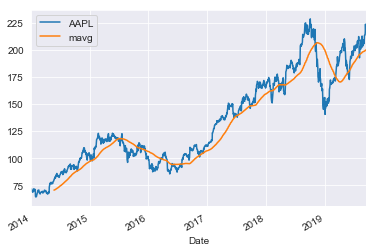

<Figure size 720x576 with 0 Axes>

In [6]:
# Plotting close_px and Moving average for comparision

close_px.plot(label = 'AAPL',legend=True)
mavg.plot(label = 'mavg',legend=True)
plt.figure(figsize=(10,8))

# Both of them have same trend

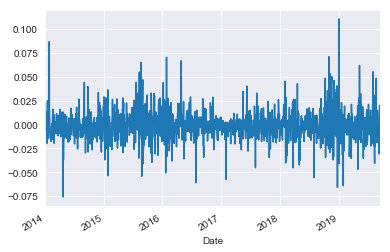

In [7]:
# Calculating Returns and plotting it

rets = close_px / close_px.shift(-1) - 1
rets.plot(label = 'Return')

In [8]:
# Extarct Adj close values for Apple, GE, Google, IBM, and Microsoft to compare

dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],
                       'yahoo', start = start, end= end)['Adj Close']

In [9]:
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2013-12-31,72.338036,22.380983,558.262512,149.307556,32.801250
2014-01-02,71.320679,21.957794,554.481689,147.683655,32.582050
2014-01-03,69.754066,21.941826,550.436829,148.567215,32.362835
2014-01-06,70.134438,21.766165,556.573853,148.057816,31.678938
2014-01-07,69.632866,21.790121,567.303589,151.011002,31.924446


In [10]:
# Corerelation analysis
# Percentage change will find how much the price changes 
# compared to the previous day which defines returns

retscomp = dfcomp.pct_change()
corr = retscomp.corr()




C:\Users\Satya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Satya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


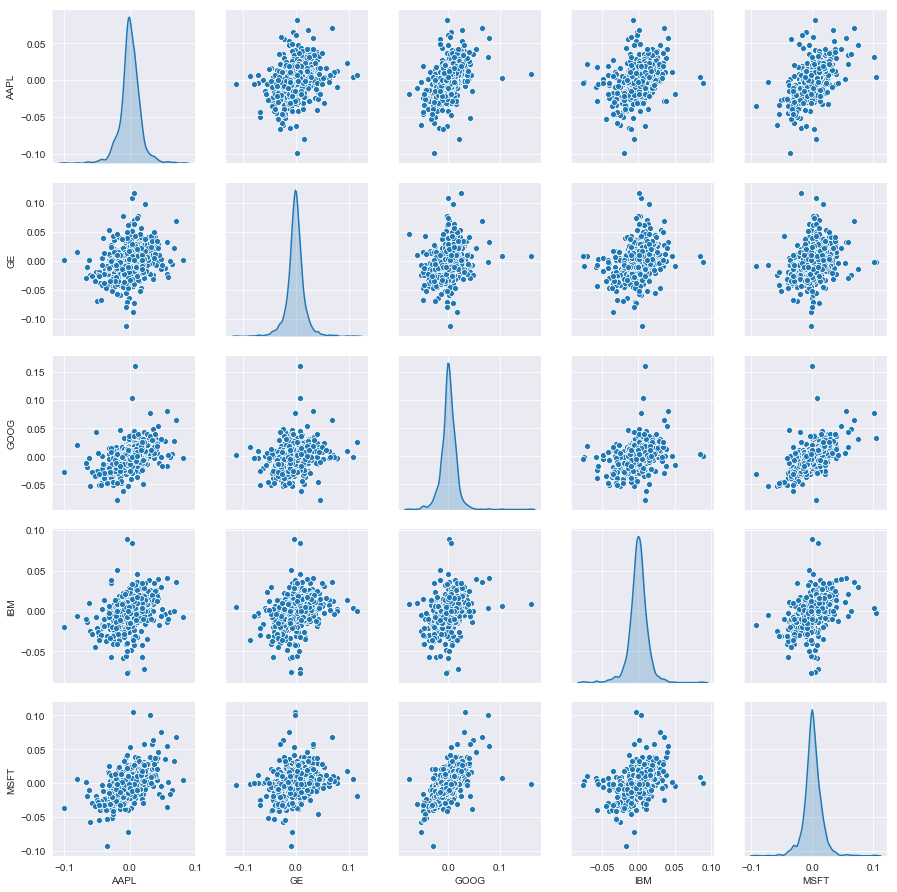

In [11]:
sns.pairplot(retscomp, diag_kind="kde" )

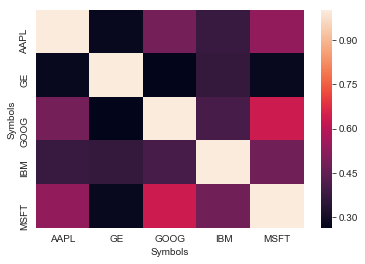

In [12]:
#heat maps to visualize the correlation ranges among the competing stocks
sns.heatmap(corr)

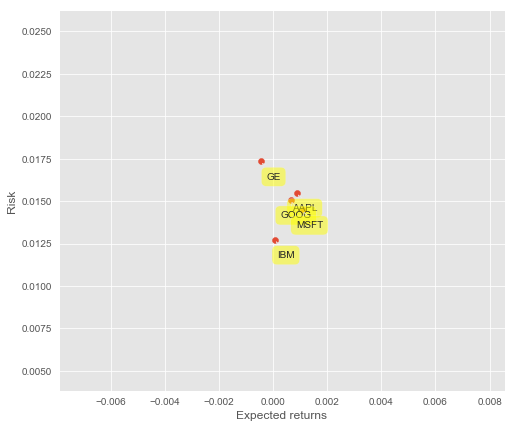

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [14]:
# Predicting stock price
# Engineering below features: 
# High Low Percentage
# selecting below existing features:
# Percentage Change
# Volume

dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High']-df['Low'])/df['Close'] *100
dfreg['Pct_change'] = (df['Close']-df['Open'])/df['Open'] * 100



In [15]:
# Data Preprocessing : Drop missing value
dfreg.dropna(inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_out

15

In [16]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)


In [17]:
dfreg.tail(16)

,Adj Close,Volume,HL_PCT,Pct_change,label
Date,,,,,
2019-08-22,212.460007,22253700.0,1.736799,-0.342416,218.75
2019-08-23,202.639999,46818000.0,5.453022,-3.242130,NaN
2019-08-26,206.490005,26043600.0,1.031529,0.306036,NaN
2019-08-27,204.160004,25873300.0,2.458858,-1.780043,NaN
2019-08-28,205.529999,15938800.0,1.167710,0.700633,NaN
2019-08-29,209.009995,20990500.0,1.272668,0.244602,NaN
2019-08-30,208.740005,21143400.0,1.556961,-0.675675,NaN
2019-09-03,205.699997,20023000.0,1.341757,-0.353629,NaN
2019-09-04,209.190002,19188100.0,1.032549,0.383897,NaN


In [18]:
# X & y arrays
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]


#X = dfreg[['Volume', 'HL_PCT', 'Pct_change']]
#y = dfreg['Adj Close']

In [19]:
# Train Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
# Creating model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lm = LinearRegression()
rm = Ridge(alpha=50)
lsm = Lasso()

In [21]:
# Training Model

lm.fit(X_train,y_train)
rm.fit(X_train,y_train)
lsm.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# model evaluation

print(lm.intercept_)
print(rm.intercept_)
print(lsm.intercept_)


134.24372402493066
134.19566079482937
134.2648939254319


In [23]:
# scores

train_score=lm.score(X_train, y_train)
test_score=lm.score(X_test, y_test)

Ridge_train_score = rm.score(X_train,y_train)
Ridge_test_score = rm.score(X_test, y_test)

Lasso_train_score = lsm.score(X_train,y_train)
Lasso_test_score = lsm.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

print("Lasso regression train score low alpha:", Lasso_train_score)
print("Lasso regression test score low alpha:", Lasso_test_score)



linear regression train score: 0.9580696509119865
linear regression test score: 0.9578454036361668
ridge regression train score low alpha: 0.9548668058740717
ridge regression test score low alpha: 0.9536519937210503
Lasso regression train score low alpha: 0.957048117616318
Lasso regression test score low alpha: 0.9572554130677907


In [24]:
# predictions from Linear regression model

lmpredictions = lm.predict(X_test)
rmpredictions = rm.predict(X_test)
lsmpredictions = rm.predict(X_test)

# compare predictions with actual results

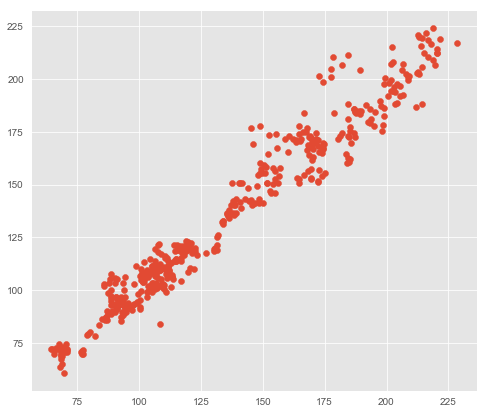

In [25]:
plt.scatter(y_test,lmpredictions)


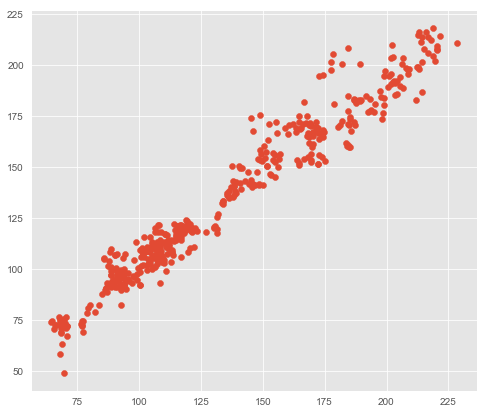

In [26]:
plt.scatter(y_test,rmpredictions)

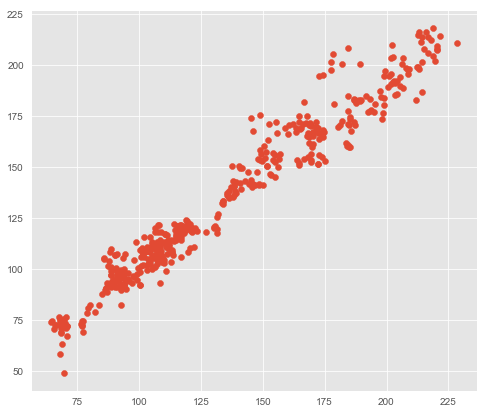

In [27]:
plt.scatter(y_test,lsmpredictions)

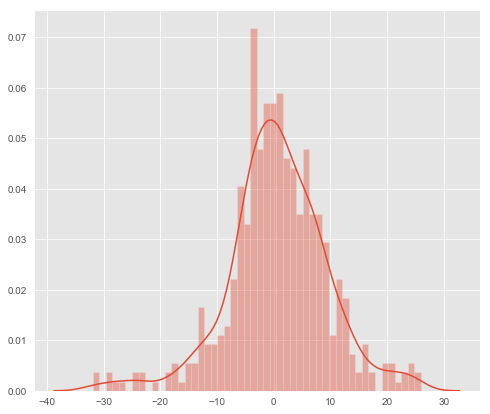

In [28]:
# Error distribution

sns.distplot(y_test-lmpredictions,bins=50)

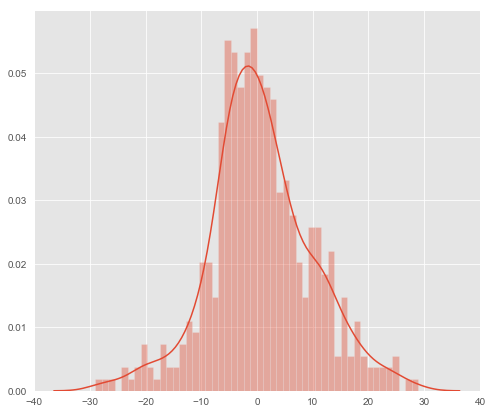

In [29]:
sns.distplot(y_test-rmpredictions,bins=50)

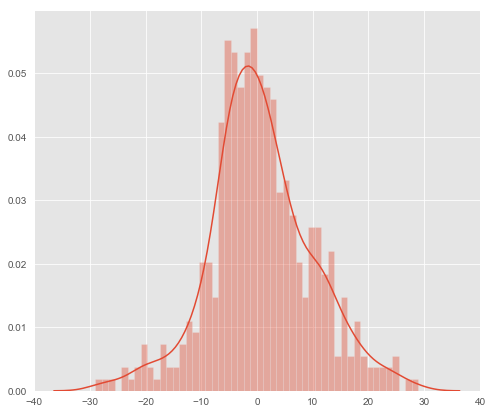

In [30]:
sns.distplot(y_test-lsmpredictions,bins=50)

In [31]:
#Comparing metrics:
#MAE is the easiest to understand, because it's the average error.
#MSE is more popular than MAE, because MSE "punishes" larger errors, 
#which tends to be useful in the real world.
#RMSE is even more popular than MSE, 
#because RMSE is interpretable in the "y" units.


In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test,lmpredictions))
print('MSE:', metrics.mean_squared_error(y_test,lmpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lmpredictions)))

MAE: 6.5025771675912
MSE: 77.43396075649876
RMSE: 8.799656854474426


In [34]:
print('MAE:', metrics.mean_absolute_error(y_test,rmpredictions))
print('MSE:', metrics.mean_squared_error(y_test,rmpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rmpredictions)))

MAE: 6.96185452936867
MSE: 85.13685360359128
RMSE: 9.226963401010718


In [35]:
print('MAE:', metrics.mean_absolute_error(y_test,lsmpredictions))
print('MSE:', metrics.mean_squared_error(y_test,lsmpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lsmpredictions)))

MAE: 6.96185452936867
MSE: 85.13685360359128
RMSE: 9.226963401010718


In [36]:
# stocks forecast
forecast_set = lm.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([201.5800084 , 206.44695815, 204.47770529, 205.62848543,
       208.99287479, 209.0079761 , 206.04362901, 209.27621286,
       212.93661162, 213.6250931 , 213.48531206, 215.13379424,
       220.71126639, 222.59679105, 217.97078214])

In [41]:
# plotting the prediction

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
    

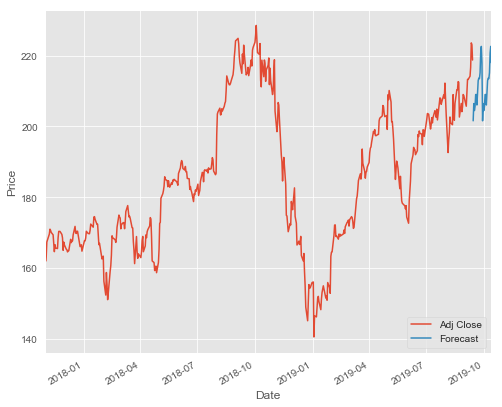

<Figure size 576x432 with 0 Axes>

In [46]:
for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(8,6))
plt.show()

In [51]:
dfreg.tail(16)

,Adj Close,Volume,HL_PCT,Pct_change,label,Forecast
Date,,,,,,
2019-09-28,NaN,NaN,NaN,NaN,NaN,217.970782
2019-09-29,NaN,NaN,NaN,NaN,NaN,201.580008
2019-09-30,NaN,NaN,NaN,NaN,NaN,206.446958
2019-10-01,NaN,NaN,NaN,NaN,NaN,204.477705
2019-10-02,NaN,NaN,NaN,NaN,NaN,205.628485
2019-10-03,NaN,NaN,NaN,NaN,NaN,208.992875
2019-10-04,NaN,NaN,NaN,NaN,NaN,209.007976
2019-10-05,NaN,NaN,NaN,NaN,NaN,206.043629
2019-10-06,NaN,NaN,NaN,NaN,NaN,209.276213
